In [1]:
import numpy as np
import psycopg2
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

In [2]:
import os
import sys
sys.path.append('..')

from alphazero import config
import stable_rad_config

Text(0.5, 0, 'Time (hours)')

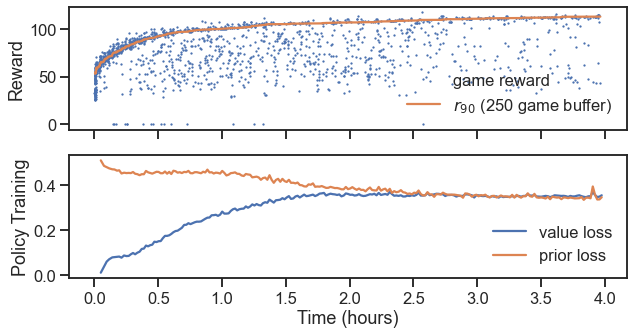

In [3]:
# Load the game buffer
with psycopg2.connect(**config.dbparams) as conn:
    df = pd.read_sql_query("select * from {}_game where experiment_id = %s".format(
        config.sql_basename), conn, params=(config.experiment_id,))
    
# Load the policy training history
log = pd.read_csv(os.path.join(config.checkpoint_filepath, 'log.csv'))
log['time'] = pd.to_datetime(log.time)

df['time_hours'] = (df.time - df.time.min()).apply(lambda x: x.total_seconds() / 3600)
log['time_hours'] = (log.time - df.time.min()).apply(lambda x: x.total_seconds() / 3600)

df = df.sort_values('time_hours')

fig, axs = plt.subplots(sharex=True, nrows=2, figsize=(10, 5))

axs[0].plot(df.time_hours, df.real_reward, '.', ms=2.5, label='game reward')
axs[0].plot(df.time_hours, df.real_reward.rolling(250, min_periods=50).quantile(.9), label='$r_{90}$ (250 game buffer)')

axs[1].plot(log.time_hours, log.policy_wrapper_loss, label='value loss')
axs[1].plot(log.time_hours, log.policy_wrapper_1_loss, label='prior loss')

axs[1].legend()
axs[0].legend()

axs[0].set_ylabel('Reward')
axs[1].set_ylabel('Policy Training')
axs[1].set_xlabel('Time (hours)')

In [23]:
df.tail(20)

id                       time   experiment_id    gameid  real_reward  \
1807  5879 2020-10-22 13:26:56.960781  03_15_atom_max  db29dbd1   111.010550   
1808  5880 2020-10-22 13:27:07.271809  03_15_atom_max  b623fcb6    83.254974   
1809  5881 2020-10-22 13:27:48.342107  03_15_atom_max  8d9d46c6   111.580420   
1810  5882 2020-10-22 13:29:16.886311  03_15_atom_max  9c10575c    44.414646   
1811  5883 2020-10-22 13:29:33.194868  03_15_atom_max  701a8360   113.044270   
1812  5884 2020-10-22 13:30:09.540546  03_15_atom_max  1b914880   113.084150   
1813  5885 2020-10-22 13:30:23.710663  03_15_atom_max  7a9b1876   113.044270   
1814  5886 2020-10-22 13:30:41.875216  03_15_atom_max  c9230f98    42.965355   
1815  5887 2020-10-22 13:30:49.281423  03_15_atom_max  3e78174a   113.044270   
1816  5888 2020-10-22 13:30:59.656558  03_15_atom_max  5a311fae   113.044270   
1817  5889 2020-10-22 13:31:01.006155  03_15_atom_max  f3e62c3d   113.816820   
1818  5890 2020-10-22 13:31:35.587945  03_15_atom_max  472e5eeb   114.607510   
1819  5891 2020-10-22 13:31:44.074893  03_15_atom_max  bcbad3ce   114.708090   
1820  5892 2020-10-22 13:31:51.480800  03_15_atom_max  e035e90b   114.708090   
1821  5893 2020-10-22 13:31:54.911809  03_15_atom_max  281385d8   113.307820   
1822  5894 2020-10-22 13:31:56.986894  03_15_atom_max  1245e80c    64.450790   
1823  5895 2020-10-22 13:32:01.192940  03_15_atom_max  9f2416e5   111.349650   
1824  5896 2020-10-22 13:32:14.507997  03_15_atom_max  bbba41dc   107.310200   
1825  5897 2020-10-22 13:32:24.828297  03_15_atom_max  4ac33b12   114.578230   
1826  5898 2020-10-22 13:32:53.623653  03_15_atom_max  1b56f5e7    43.351086   

                             final_smiles  time_hours  
1807     [CH2]C(N=C)=C(C(N)=NO)C(C)(CC)CC    3.865000  
1808      C[C](C)C(=C(C)C(CN)=NN)C(C)(C)N    3.867864  
1809  [CH2]C(=C(C(C)=C(C)S)C(C)(C)C)N(N)N    3.879273  
1810  [CH2]OC1=C(C)C(=O)C(=C(C)N(C)C)C1=S    3.903868  
1811  [CH2]C(=C(C(C)=C(N)S)C(C)(C)C)N(N)N    3.908399  
1812  [CH2]C(=C(C(C)=NN)C(C)(C)N)C(C)(C)C    3.918495  
1813  [CH2]C(=C(C(C)=C(N)S)C(C)(C)C)N(N)N    3.922431  
1814                         [CH]=C1SC1=C    3.927477  
1815  [CH2]C(=C(C(C)=C(N)S)C(C)(C)C)N(N)N    3.929534  
1816  [CH2]C(=C(C(C)=C(N)S)C(C)(C)C)N(N)N    3.932416  
1817    [CH2]C(=C(C(=CN)CC)C(C)(C)C)N(C)N    3.932791  
1818    CC[C@](C)(N)C(=C(C)[CH]N)C(C)(C)C    3.942397  
1819    [CH2]C(=C(C(C)=NN)C(C)(C)CO)N(C)N    3.944754  
1820    [CH2]C(=C(C(C)=NN)C(C)(C)CO)N(C)N    3.946811  
1821       CCC(S)=NC(=C(C)[CH]N)C(C)(C)CC    3.947764  
1822       C[CH][C@](C)(NC)C(=NN)C(C)(C)C    3.948341  
1823  [CH2]C(N=C)=C(C(=NN)C(C)=O)C(C)(C)C    3.949509  
1824      [CH2]C(C(=C)CN)=C(N=C)C(C)(C)CC    3.953208  
1825  [CH2]C(=C(C(C)=NN)C(C)(C)C)C(C)(N)N    3.956075  
1826      [CH]=C1N=C(CC)N=C1C(=S)C(C)(C)C    3.964073

In [44]:
# Load the reward buffer to plot the optimal molecules
with psycopg2.connect(**dbparams) as conn:
    rew_df = pd.read_sql_query("select * from {}_reward".format(config.sql_basename), conn)

rew_df.shape

(965456, 7)

In [45]:
rew_df.sort_values('real_reward', ascending=False).head(10)

smiles                       time  \
801727      C=C(C(C)C)C(C([O])=O)(N(C)C)N(C)C 2020-10-22 11:32:51.080562   
697377     CCN(C)[C@@](OC)(C([O])=O)N(C)C(C)C 2020-10-22 10:54:22.618236   
742587      CN(O)C(=O)C(C([O])=O)(N(C)C)N(C)C 2020-10-22 11:09:10.883222   
868939        CC1=C[C@]1([O])N(C(C)C)C(C)(C)C 2020-10-22 12:06:42.490719   
697330     CCO[C@@](C([O])=O)(N(C)C)N(C)C(C)C 2020-10-22 10:54:22.027057   
783169  CC(=O)[C@@](C([O])=O)(N(C)C)N(C)C(C)C 2020-10-22 11:25:51.098359   
663351     C=C(O)[C@](C([O])=O)(N(C)C)N(C)CCC 2020-10-22 10:44:44.413717   
708018  C=C(C)[C@@](C([O])=O)(N(C)C)N(C)C(C)C 2020-10-22 10:57:56.041969   
744627   C=C(C)[C@](C([O])=O)(N(C)C)N(C)C(C)C 2020-10-22 11:10:34.069426   
851177    CC(C)N(C(C)(C)CO)[C@@](C)([O])N(C)C 2020-10-22 11:55:06.832184   

        real_reward atom_type  buried_vol  max_spin  atom_index  
801727   125.286545         C   84.191390  0.178097           5  
697377   123.938200         C   83.308556  0.187407           4  
742587   122.236010         C   79.746850  0.150217           5  
868939   120.605890         N   78.927704  0.166436           5  
697330   120.559074         C   82.196130  0.232741           3  
783169   120.482110         C   82.235310  0.235064           3  
663351   120.424030         C   80.067890  0.192877           3  
708018   120.378260         C   83.819910  0.268833           3  
744627   120.307510         C   83.008896  0.254028           3  
851177   120.216470         N   88.050660  0.356684           3

In [64]:
stable_df = pd.read_csv('/home/pstjohn/Research/20200608_redox_calculations/stable_radicals/stable-with-H-sas-numatoms.csv', index_col=0)

In [68]:
stable_df['can_smiles'] = stable_df.smiles.apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))

In [71]:
stable_df.can_smiles.isin(rew_df.smiles).any()

False

In [26]:
def is_pareto_efficient(costs, return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    orig_costs = np.array(costs)
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return orig_costs[is_efficient_mask]
    else:
        return is_efficient

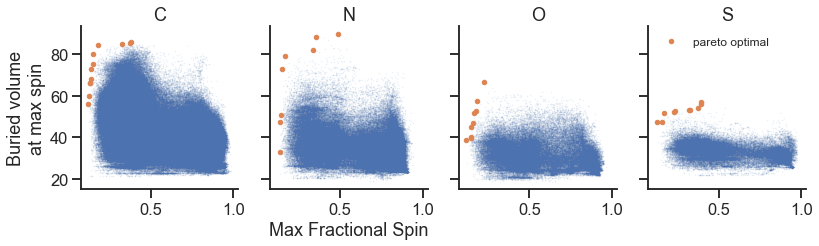

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(13, 3), sharex=True, sharey=True)

optimal = []
for ax, atom in zip(axs, ['C', 'N', 'O', 'S']):
    
    vals = rew_df[rew_df.atom_type == atom][['max_spin', 'buried_vol']].dropna()
    vals['buried_vol'] *= -1
    pareto_index = is_pareto_efficient(vals.values, return_mask=False)
    pareto_points = vals.iloc[pareto_index]
    optimal += [vals.iloc[pareto_index].index]
    
    ax.plot(rew_df[rew_df.atom_type == atom]['max_spin'],
            rew_df[rew_df.atom_type == atom]['buried_vol'], '.', ms=1, alpha=.1)
    
    ax.plot(pareto_points['max_spin'], -pareto_points['buried_vol'], '.', label='pareto optimal')
    
    ax.set_title(atom)

    
axs[1].set_xlabel('Max Fractional Spin')
axs[0].set_ylabel('Buried volume\nat max spin')

axs[-1].legend(loc='upper left', fontsize=12)
sns.despine()    

In [28]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
from IPython.display import SVG

INFO:rdkit:Enabling RDKit 2020.03.4 jupyter extensions


In [30]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
import nfp

In [42]:
from run_mcts import predict
from alphazero.node import Node

def pred_spins(mol):
    spins, _ = predict(
        {key: tf.constant(np.expand_dims(val, 0))
         for key, val in Node(mol).policy_inputs.items()})
    
    return spins.numpy().flatten()

In [35]:
# Code for raster image drawing
from rdkit.Chem.Draw import SimilarityMaps

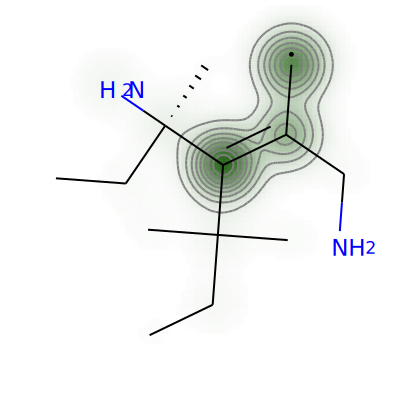

In [56]:
row = rew_df.reindex(pd.Series(optimal[0]).sample(5)).iloc[0]
mol = Chem.MolFromSmiles(row.smiles)

d = rdMolDraw2D.MolDraw2DSVG(400, 400)
SimilarityMaps.GetSimilarityMapFromWeights(mol, [float(i) for i in pred_spins(mol)], draw2d=d)
d.FinishDrawing()
SVG(d.GetDrawingText())

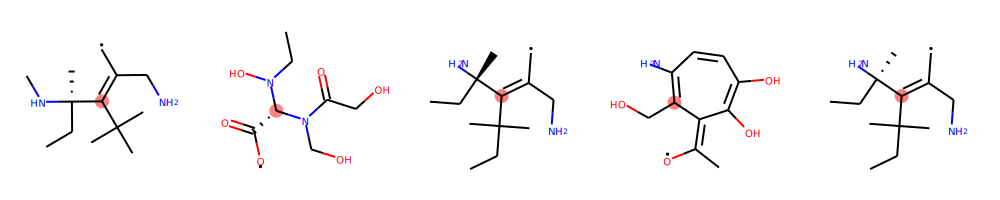

In [57]:
to_plot = rew_df.reindex(pd.Series(optimal[0]).sample(5))
d2d = rdMolDraw2D.MolDraw2DSVG(1000, 200, 200, 200)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

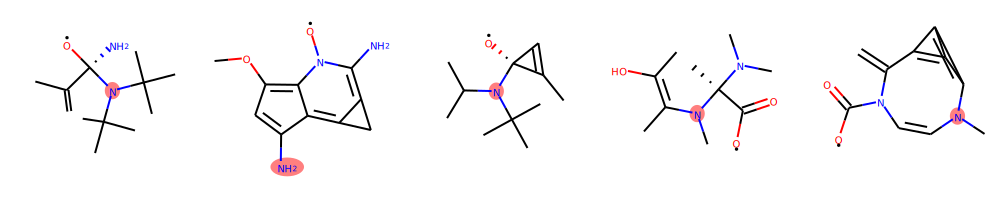

In [58]:
to_plot = rew_df.reindex(pd.Series(optimal[1]).sample(5))
d2d = rdMolDraw2D.MolDraw2DSVG(1000, 200, 200, 200)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

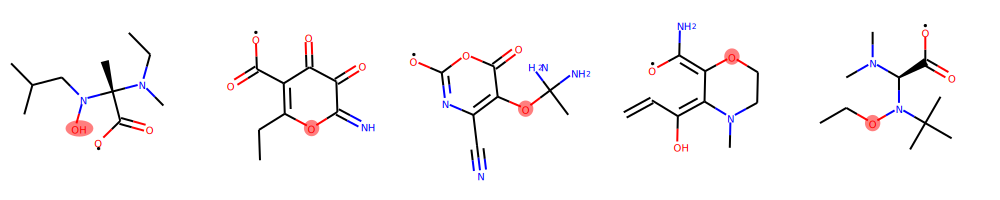

In [59]:
to_plot = rew_df.reindex(pd.Series(optimal[2]))[rew_df.reindex(pd.Series(optimal[2])).buried_vol > 45].sample(5)
d2d = rdMolDraw2D.MolDraw2DSVG(1000, 200, 200, 200)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

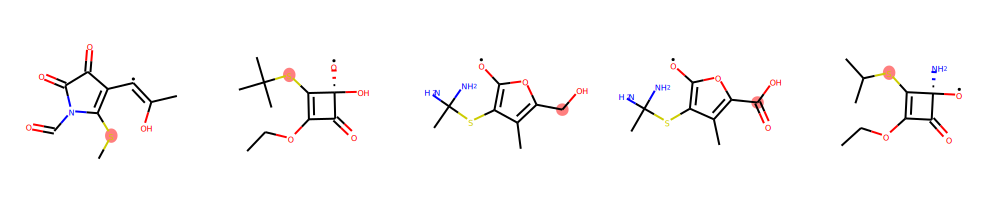

In [60]:
to_plot = rew_df.reindex(pd.Series(optimal[3]).sample(5))
d2d = rdMolDraw2D.MolDraw2DSVG(1000, 200, 200, 200)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

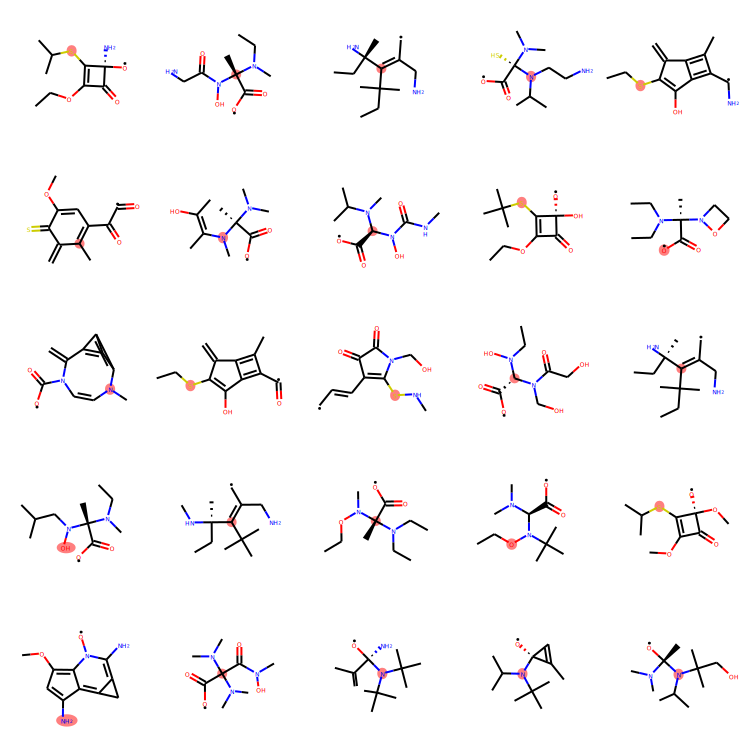

In [61]:
to_plot = rew_df.reindex(np.concatenate(optimal)).sample(25)
d2d = rdMolDraw2D.MolDraw2DSVG(150*5, 150*5, 150, 150)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

looks like atom ordering isn't consistent

TODO: 
* Maybe do ranked reward on an atom-by-atom basis?
* http://rdkit.blogspot.com/2020/01/similarity-maps-with-new-drawing-code.html
* add large pieces at once? (benzyl ring, etc)